In [1]:
!pip install keras==2.3.1
!pip install tensorflow==2.2.0
!pip install protobuf==3.19.6                                                                
!pip install opencv-python==4.4.0.46
!pip install scikit-learn
!pip install matplotlib
!pip install numpy

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
from keras.utils.np_utils import to_categorical
from keras.layers import MaxPooling2D
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Convolution2D
from keras.models import Sequential
from keras.models import model_from_json

Using TensorFlow backend.


In [4]:
IMG_SIZE=128

In [5]:
import os

In [ ]:
def loaddataset(basepath):
  X,Y=[],[]
  for label, folder in enumerate(['no','yes']):
    folder_path=os.path.join(basepath,folder)
    for file in os.listdir(folder_path):
      path=os.path.join(folder_path,file) #Joins the basepath (your main dataset directory) with the current folder name ('no' or 'yes')
      print(path)
      img=cv2.imread(path,0)
      if img is None:
        continue
      #img=cv2.resize(img,IMG_SIZE,IMG_SIZE)
      #img=cv2.reshape(img,IMG_SIZE,IMG_SIZE,1)
      img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
      img = img.reshape(IMG_SIZE, IMG_SIZE, 1)

      X.append(img)
      Y.append(label)
  return np.array(X), np.array(Y)

In [7]:
#sr="dataset"
#
#
sr="C://Users//ASUS//Videos//full stack//medical project//dataset"
X,Y = loaddataset(sr)

C://Users//ASUS//Videos//full stack//medical project//dataset\no\1 no.jpeg
C://Users//ASUS//Videos//full stack//medical project//dataset\no\10 no.jpg
C://Users//ASUS//Videos//full stack//medical project//dataset\no\11 no.jpg
C://Users//ASUS//Videos//full stack//medical project//dataset\no\12 no.jpg
C://Users//ASUS//Videos//full stack//medical project//dataset\no\13 no.jpg
C://Users//ASUS//Videos//full stack//medical project//dataset\no\14 no.jpg
C://Users//ASUS//Videos//full stack//medical project//dataset\no\15 no.jpg
C://Users//ASUS//Videos//full stack//medical project//dataset\no\17 no.jpg
C://Users//ASUS//Videos//full stack//medical project//dataset\no\18 no.jpg
C://Users//ASUS//Videos//full stack//medical project//dataset\no\19 no.jpg
C://Users//ASUS//Videos//full stack//medical project//dataset\no\2 no.jpeg
C://Users//ASUS//Videos//full stack//medical project//dataset\no\20 no.jpg
C://Users//ASUS//Videos//full stack//medical project//dataset\no\21 no.jpg
C://Users//ASUS//Videos//

In [ ]:
#Converts your image data (X) to float type.
#Divides all pixel values by 255.0 to normalize them to the range [0, 1].
X = X.astype("float")/255.0

#Converts numeric labels like 0 and 1 into one-hot encoded vectors.
Y = to_categorical(Y)
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [9]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(128, 128, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [10]:
import pickle

In [11]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()
hist = model.fit(X_train, y_train, batch_size=16, epochs=10, validation_split=0.2, shuffle=True, verbose=2)
os.makedirs('Model', exist_ok=True)
model.save_weights('Model/model_weights.h5')



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3686528   
_________________________________________________________________
dense_2 (Dense)              (None, 2)                

In [12]:
import pickle

In [13]:
model_json = model.to_json()
with open("Model/model.json","w")  as json_file:
    json_file.write(model_json)

f=open("Model/histoy.pckl","wb")
pickle.dump(hist.history, f)
f.close()

In [14]:
loss,  accuracy = model.evaluate(X_test, y_test, verbose=0)
print(loss)
print(accuracy)

0.4287970209238576
0.9215686321258545


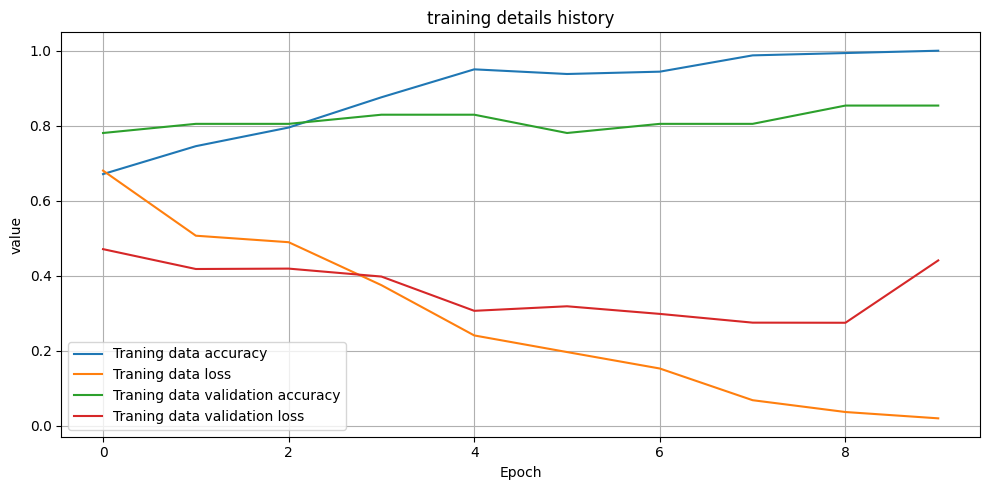

In [15]:
#call matplotlib graphs to draw accuracy performance value
acc=hist.history['accuracy']
los=hist.history['loss']

val_acc=hist.history['val_accuracy']
val_los=hist.history['val_loss']

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(acc,label="Traning data accuracy")
plt.plot(los,label="Traning data loss")
plt.plot(val_acc,label="Traning data validation accuracy")
plt.plot(val_los,label="Traning data validation loss")

#x and y axis.
plt.xlabel('Epoch')
plt.ylabel('value')

plt.title('training details history')
#which call the matplotlib
plt.legend()
plt.grid(True)
#structure of the frame
plt.tight_layout()
plt.show()

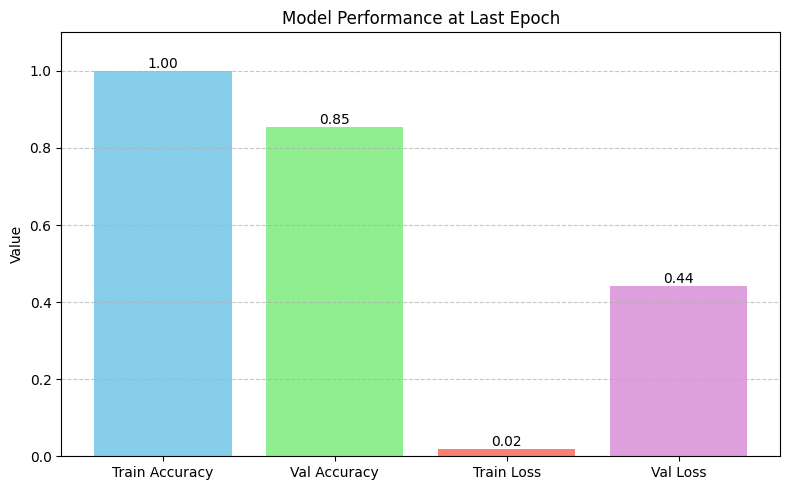

In [16]:
import matplotlib.pyplot as plt

# Get the last epoch's metrics
last_acc = hist.history['accuracy'][-1]
last_val_acc = hist.history['val_accuracy'][-1]
last_loss = hist.history['loss'][-1]
last_val_loss = hist.history['val_loss'][-1]

# Labels and values for the bar chart
labels = ['Train Accuracy', 'Val Accuracy', 'Train Loss', 'Val Loss']
values = [last_acc, last_val_acc, last_loss, last_val_loss]
colors = ['skyblue', 'lightgreen', 'salmon', 'plum']

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=colors)

# Annotate bars with values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}',
             ha='center', va='bottom', fontsize=10)

# Titles and labels
plt.title('Model Performance at Last Epoch')
plt.ylabel('Value')
plt.ylim(0, max(values) + 0.1)  # Adjust Y-axis if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

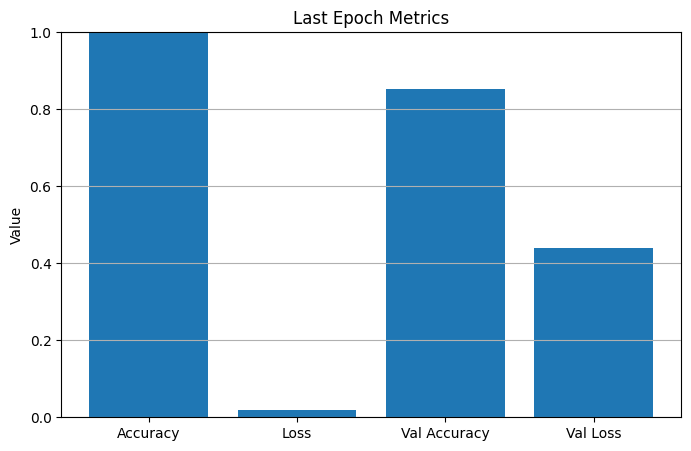

In [17]:
last_values=[acc[-1],los[-1],val_acc[-1],val_los[-1]]
labels=['Accuracy','Loss','Val Accuracy','Val Loss']

plt.figure(figsize=(8,5))
plt.bar(labels,last_values)
plt.title('Last Epoch Metrics')
plt.ylabel('Value')
plt.ylim(0,1)
plt.grid(axis='y')
plt.show()

In [18]:
import cv2
import numpy as np
from keras.models import model_from_json


In [21]:
jsonmodels=open('Model/model.json','r')
loaddata=jsonmodels.read()
jsonmodels.close()

model=model_from_json(loaddata)
model.load_weights("Model/model_weights.h5")
print("[INFO] Loaded model from disk.")

[INFO] Loaded model from disk.


In [25]:
disease=['No tumor detected','tumor detected']

filename="C://Users//ASUS//Videos//full stack//medical project//dataset//yes//Y1.jpg"
img=cv2.imread(filename,0)
img=cv2.resize(img,(128,128))
img=img.reshape(1,128,128,1)
img=img.astype('float32') / 255.0



In [26]:
predicts=model.predict(img)
cls=np.argmax(predicts)
print(f"[INFO] Prediction Probabilities: {predicts}")
print(f"[INFO] Classified as :{disease[cls]}")

[INFO] Prediction Probabilities: [[1.7618311e-05 9.9998236e-01]]
[INFO] Classified as :tumor detected
